In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv("csvfiles/usa_earthquake.csv")

In [102]:
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2015-12-30T07:39:29.310Z,48.5865,-123.300333,52.521,4.79,ml,27.0,81.00,0.11670,0.1900,...,2016-03-27T06:53:13.880Z,"17km NNE of Victoria, Canada",earthquake,0.43,0.67,0.137,178.0,reviewed,uw,uw
1,2015-12-30T01:48:57.310Z,34.1910,-117.413167,6.980,4.40,mw,173.0,23.00,0.08052,0.2500,...,2016-03-18T01:13:07.040Z,"4km SSW of Devore, CA",earthquake,0.14,0.51,NaN,6.0,reviewed,ci,ci
2,2015-12-29T11:39:19.200Z,35.6654,-97.405400,6.532,4.30,mwr,NaN,53.00,NaN,0.7800,...,2016-03-18T01:13:06.040Z,"6km ENE of Edmond, Oklahoma",earthquake,3.60,5.00,0.033,88.0,reviewed,tul,us
3,2015-12-28T15:10:30.588Z,41.4562,-118.905000,17.700,4.10,ml,13.0,83.52,0.83000,0.1615,...,2016-03-18T01:13:05.040Z,"65km SSW of Denio Junction, Nevada",earthquake,2.39,6.70,0.230,9.0,reviewed,nn,nn
4,2015-12-27T19:24:56.620Z,25.6559,-120.924300,10.000,4.90,mb,NaN,196.00,7.22900,1.3900,...,2016-04-15T00:59:18.000Z,North Pacific Ocean,earthquake,10.40,1.90,0.075,56.0,reviewed,us,us


In [103]:
df = df[df.mag > 5][['time','latitude','longitude','depth','mag']]

In [104]:
df.head(5)

,time,latitude,longitude,depth,mag
32,2015-09-13T08:27:12.440Z,24.9529,-109.7119,10.0000,5.20
33,2015-09-13T08:14:08.560Z,24.9130,-109.6226,10.0000,6.70
34,2015-09-13T07:57:33.460Z,24.8094,-109.5138,10.0000,5.60
35,2015-09-13T07:40:36.570Z,24.9056,-109.6985,10.0000,5.30
61,2015-05-22T18:47:42.980Z,37.2925,-114.6546,4.0328,5.27


In [105]:
df['time'] = pd.to_datetime(df['time'])
#df = df[df['time'].dt.year > 1990]

In [106]:
df.head(5)

,time,latitude,longitude,depth,mag
32,2015-09-13 08:27:12.440,24.9529,-109.7119,10.0000,5.20
33,2015-09-13 08:14:08.560,24.9130,-109.6226,10.0000,6.70
34,2015-09-13 07:57:33.460,24.8094,-109.5138,10.0000,5.60
35,2015-09-13 07:40:36.570,24.9056,-109.6985,10.0000,5.30
61,2015-05-22 18:47:42.980,37.2925,-114.6546,4.0328,5.27


In [107]:
df.sort(ascending=False)

/Users/palominogallo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,time,latitude,longitude,depth,mag
2993,1986-01-26 19:20:51.200,36.810000,-121.275000,7.0000,5.40
2977,1986-03-31 11:55:40.000,37.483000,-121.690000,8.0000,5.60
2964,1986-06-25 20:27:44.940,37.264667,-116.330000,0.0100,5.11
2962,1986-07-08 09:20:44.560,33.999000,-116.608000,9.4680,6.00
2954,1986-07-13 13:47:08.210,32.971000,-117.874000,5.8280,5.45
2950,1986-07-17 21:00:00.790,37.278667,-116.355667,0.0100,5.22
2948,1986-07-20 14:29:46.060,37.567000,-118.436000,4.0100,5.84
2944,1986-07-21 14:42:26.660,37.538000,-118.441000,4.0600,6.35
2940,1986-07-21 14:51:09.260,37.550000,-118.324000,4.8030,5.42
2926,1986-07-21 22:07:18.410,37.618000,-118.480000,4.0100,5.19


In [108]:
df['dt'] = (df['time'] - df['time'].shift(-1) )/  np.timedelta64(1, 'h')
df['r'] = pow(df['latitude']-df['latitude'].shift(-1),2)*pow(111,2)+pow(df['longitude']-df['longitude'].shift(-1),2)*pow(111,2)
df['r'] = df['r']+pow(df['depth']-df['depth'].shift(-1),2)
df['r'] = np.sqrt(df['r'])
df =  df[df['r']>100]

In [109]:
df.head(10)


,time,latitude,longitude,depth,mag,dt,r
35,2015-09-13 07:40:36.570,24.905600,-109.698500,10.0000,5.30,2724.881553,1480.929324
61,2015-05-22 18:47:42.980,37.292500,-114.654600,4.0328,5.27,2733.647019,1154.668293
82,2015-01-28 21:08:53.710,40.317833,-124.606667,17.1700,5.73,3242.692528,1588.110420
129,2014-09-15 18:27:20.610,30.420900,-114.274900,10.0000,5.40,536.110150,1242.759040
136,2014-08-24 10:20:44.070,38.215167,-122.312333,11.1200,6.02,327.573917,1665.118389
139,2014-08-10 18:46:17.970,27.681400,-111.631900,10.0000,5.50,1021.778494,608.870029
147,2014-06-29 04:59:35.390,32.582200,-109.168200,6.4400,5.30,2208.831450,982.488247
171,2014-03-29 04:09:42.170,33.932500,-117.915833,5.0900,5.10,171.192425,577.242963
175,2014-03-22 00:58:09.440,30.440000,-114.063300,12.5000,5.30,2120.205592,5293.811188
209,2013-12-23 16:45:49.310,25.719400,-66.605600,2.0800,5.20,1558.848503,4852.579488


In [110]:
df['ratio'] = df['r'] / df['dt']

In [111]:
df.head(10)

,time,latitude,longitude,depth,mag,dt,r,ratio
35,2015-09-13 07:40:36.570,24.905600,-109.698500,10.0000,5.30,2724.881553,1480.929324,0.543484
61,2015-05-22 18:47:42.980,37.292500,-114.654600,4.0328,5.27,2733.647019,1154.668293,0.422391
82,2015-01-28 21:08:53.710,40.317833,-124.606667,17.1700,5.73,3242.692528,1588.110420,0.489751
129,2014-09-15 18:27:20.610,30.420900,-114.274900,10.0000,5.40,536.110150,1242.759040,2.318104
136,2014-08-24 10:20:44.070,38.215167,-122.312333,11.1200,6.02,327.573917,1665.118389,5.083184
139,2014-08-10 18:46:17.970,27.681400,-111.631900,10.0000,5.50,1021.778494,608.870029,0.595892
147,2014-06-29 04:59:35.390,32.582200,-109.168200,6.4400,5.30,2208.831450,982.488247,0.444800
171,2014-03-29 04:09:42.170,33.932500,-117.915833,5.0900,5.10,171.192425,577.242963,3.371895
175,2014-03-22 00:58:09.440,30.440000,-114.063300,12.5000,5.30,2120.205592,5293.811188,2.496839
209,2013-12-23 16:45:49.310,25.719400,-66.605600,2.0800,5.20,1558.848503,4852.579488,3.112926


In [112]:
df = df.dropna()

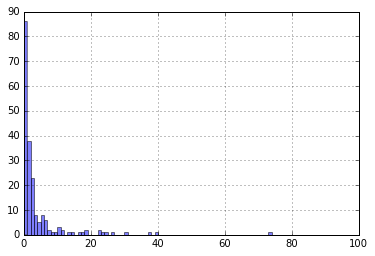

In [113]:
df['ratio'].hist(bins=100,range=(0,100),alpha=0.5)

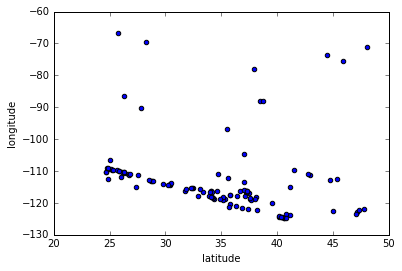

In [114]:
df1 = df[df['ratio']>1]
df1.plot.scatter(x='latitude', y='longitude');

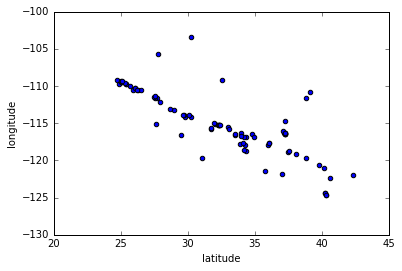

In [117]:
df2 = df[df['ratio']<1]
df2.plot.scatter(x='latitude', y='longitude');

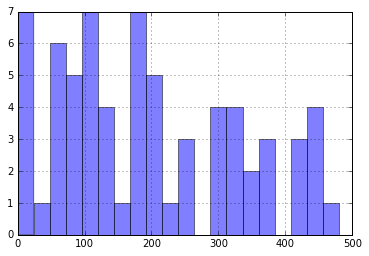

In [116]:
df['dt'].hist(bins=20,range=(0,480),alpha=0.5)